# Danilo Montalvo
## Lab Seven: Sequential Networks

In [107]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np
import pandas as pd

# Load the data
train_data = pd.read_csv('/Users/danilomontalvo/Desktop/CNNHousing/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/Users/danilomontalvo/Desktop/CNNHousing/house-prices-advanced-regression-techniques/test.csv')

# Check the shape and the first few rows of the training & test data
print(train_data.shape)
print(train_data.head())
print(test_data.shape)
print(test_data.head())


(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

In [108]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Embedding, Input, Concatenate
from tensorflow.keras.layers import Subtract
from tensorflow.keras.utils import plot_model
import tensorflow as tf

EMBED_SIZE = 50

# Define the input layer
sequence_input = Input(shape=(X_train.shape[1],))

# Embedding layer
embedded_sequences = Embedding(input_dim=top_words,  # Using top_words as the input dimension
                               output_dim=EMBED_SIZE,  # Set the output dimension
                               input_length=max_review_length)(sequence_input)

# Convolutional layers
x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)

x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(x)
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)

x = Conv1D(64, 5, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)

# Global average pooling
x_mean = GlobalAveragePooling1D()(x)
x_tmp = Subtract()([x, x_mean])
x_std = GlobalAveragePooling1D()(x_tmp**2)

# Concatenate the mean and standard deviation features
x = Concatenate(name='concat_1')([x_mean, x_std])

# Dense layers
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.2)(x)

# Output layer
preds = Dense(NUM_CLASSES, activation='sigmoid', kernel_initializer='glorot_uniform')(x)

# Define the model
model = Model(sequence_input, preds)

# Print model summary
print(model.summary())

# Plot the model architecture
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)


Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 500)]        0           []                               
                                                                                                  
 embedding_22 (Embedding)       (None, 500, 50)      50000       ['input_11[0][0]']               
                                                                                                  
 conv1d_20 (Conv1D)             (None, 496, 64)      16064       ['embedding_22[0][0]']           
                                                                                                  
 max_pooling1d_12 (MaxPooling1D  (None, 99, 64)      0           ['conv1d_20[0][0]']              
 )                                                                                         

In [109]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)

opt = Adam(learning_rate=lr_schedule, epsilon=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [110]:
%%time 

history = []
tmp = model.fit(X_train, y_train, epochs=5, 
                batch_size=64, 
                validation_data=(X_test, y_test))
history.append( tmp )


Epoch 1/5
391/391 [==============================] - 33s 82ms/step - loss: 0.6214 - accuracy: 0.6154 - val_loss: 0.4205 - val_accuracy: 0.8103
Epoch 2/5
391/391 [==============================] - 33s 85ms/step - loss: 0.3612 - accuracy: 0.8465 - val_loss: 0.3487 - val_accuracy: 0.8468
Epoch 3/5
391/391 [==============================] - 32s 83ms/step - loss: 0.3085 - accuracy: 0.8703 - val_loss: 0.3051 - val_accuracy: 0.8702
Epoch 4/5
391/391 [==============================] - 34s 88ms/step - loss: 0.2786 - accuracy: 0.8852 - val_loss: 0.2937 - val_accuracy: 0.8765
Epoch 5/5
391/391 [==============================] - 33s 83ms/step - loss: 0.2454 - accuracy: 0.9007 - val_loss: 0.3039 - val_accuracy: 0.8710
CPU times: user 6min 46s, sys: 4min 35s, total: 11min 22s
Wall time: 2min 45s


In [111]:

# run this as many times as we want! Adds 5 epochs each time
tmp = model.fit(X_train, y_train, epochs=5, 
                batch_size=64, 
                validation_data=(X_test, y_test))
history.append( tmp )

Epoch 1/5
391/391 [==============================] - 33s 84ms/step - loss: 0.2161 - accuracy: 0.9134 - val_loss: 0.2928 - val_accuracy: 0.8755
Epoch 2/5
391/391 [==============================] - 35s 89ms/step - loss: 0.1809 - accuracy: 0.9293 - val_loss: 0.3191 - val_accuracy: 0.8715
Epoch 3/5
391/391 [==============================] - 33s 84ms/step - loss: 0.1472 - accuracy: 0.9435 - val_loss: 0.3393 - val_accuracy: 0.8722
Epoch 4/5
391/391 [==============================] - 32s 82ms/step - loss: 0.1201 - accuracy: 0.9545 - val_loss: 0.3596 - val_accuracy: 0.8683
Epoch 5/5
391/391 [==============================] - 30s 77ms/step - loss: 0.0980 - accuracy: 0.9630 - val_loss: 0.4055 - val_accuracy: 0.8672


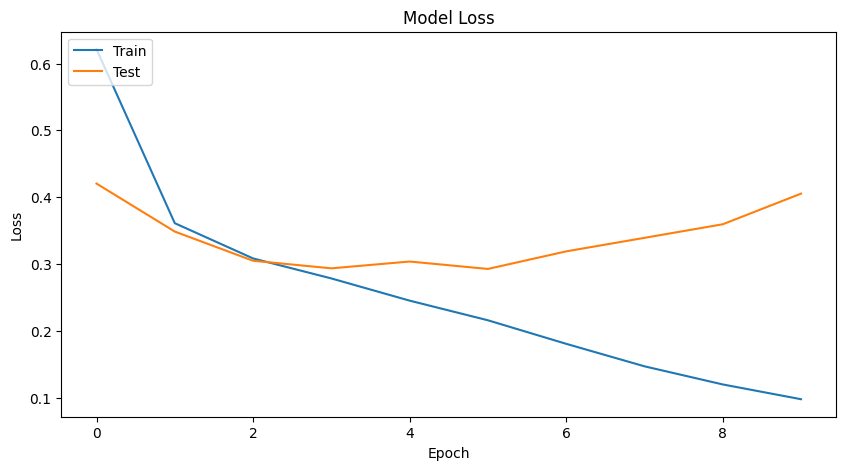

In [112]:
from sklearn import metrics as mt
from matplotlib import pyplot as plt
%matplotlib inline

# combine all the history from training together
combined = dict()
for key in ['loss','val_loss']:
    combined[key] = np.hstack([x.history[key] for x in history])
    
# summarize history for loss
plt.figure(figsize=(10,5))
plt.plot(combined['loss'])
plt.plot(combined['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



## Tranformers

In [113]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Layer

# The transformer architecture 
class TransformerBlock(Layer): # inherit from Keras Layer
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.2):
        super().__init__()
        # setup the model heads and feedforward network
        self.att = MultiHeadAttention(num_heads=num_heads, 
                                      key_dim=embed_dim)
        
        # make a two layer network that processes the attention
        self.ffn = Sequential()
        self.ffn.add( Dense(ff_dim, activation='relu') )
        self.ffn.add( Dense(embed_dim) )
        
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training):

        attn_output = self.att(inputs, inputs)
        
        # create residual output, with attention
        out1 = self.layernorm1(inputs + attn_output)
        
        # apply dropout if training
        out1 = self.dropout1(out1, training=training)
        
        # place through feed forward after layer norm
        ffn_output = self.ffn(out1)
        out2 = self.layernorm2(out1 + ffn_output)
        
        # apply dropout if training
        out2 = self.dropout2(out2, training=training)
        #return the residual from Dense layer
        return out2
    
class TokenAndPositionEmbedding(Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        # create two embeddings 
        self.token_emb = Embedding(input_dim=vocab_size, 
                                   output_dim=embed_dim)

        self.pos_emb = Embedding(input_dim=maxlen, 
                                 output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x) 
        return x + positions 


In [114]:

embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = Input(shape=(X_train.shape[1],))
x = TokenAndPositionEmbedding(X_train.shape[1], top_words, embed_dim)(inputs) # Adjust vocab_size and maxlen according to your dataset
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
x = Dense(20, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(NUM_CLASSES, activation='sigmoid',
              kernel_initializer='glorot_uniform')(x)

model_xformer = Model(inputs=inputs, outputs=outputs)
print(model_xformer.summary())


Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 500)]             0         
                                                                 
 token_and_position_embeddin  (None, 500, 32)          48000     
 g_4 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_4 (Transf  (None, 500, 32)          10656     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_18  (None, 32)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_52 (Dropout)        (None, 32)                0  

In [115]:
model_xformer.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

history = model_xformer.fit(
    X_train, y_train, batch_size=64, epochs=2, 
    validation_data=(X_test, y_test)
)


Epoch 1/2
391/391 [==============================] - 370s 940ms/step - loss: 0.5647 - accuracy: 0.6683 - val_loss: 0.3848 - val_accuracy: 0.8319
Epoch 2/2
391/391 [==============================] - 368s 941ms/step - loss: 0.3281 - accuracy: 0.8645 - val_loss: 0.3153 - val_accuracy: 0.8691


782/782 [==============================] - 121s 155ms/step


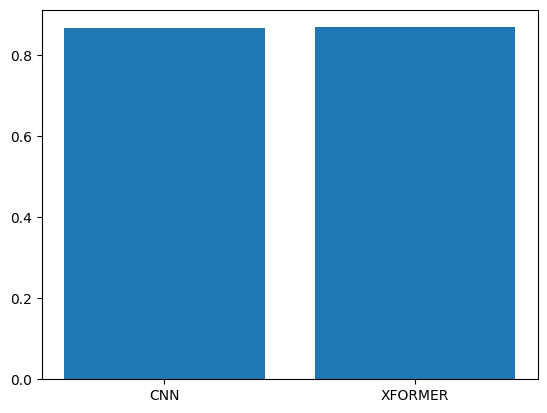

In [116]:
yhat_cnn = model.predict(X_test)
yhat_xformer = model_xformer.predict(X_test)

acc = [mt.accuracy_score(y_test.round(), yhat_cnn.round()),
       mt.accuracy_score(y_test.round(), yhat_xformer.round())]

plt.bar([1, 2], acc)
plt.xticks([1, 2], ['CNN', 'XFORMER'])
plt.show()


 ## compiling and training the Transformer model

In [119]:
model_xformer.compile(optimizer='adam', 
                      loss='binary_crossentropy', 
                      metrics=['accuracy'])

history = model_xformer.fit(
    X_train, y_train, batch_size=64, epochs=2, 
    validation_data=(X_test, y_test)
)


Epoch 1/2
391/391 [==============================] - 371s 944ms/step - loss: 0.3141 - accuracy: 0.8706 - val_loss: 0.3119 - val_accuracy: 0.8668
Epoch 2/2
391/391 [==============================] - 345s 884ms/step - loss: 0.3008 - accuracy: 0.8768 - val_loss: 0.3073 - val_accuracy: 0.8688


## comparing performance

782/782 [==============================] - 120s 153ms/step


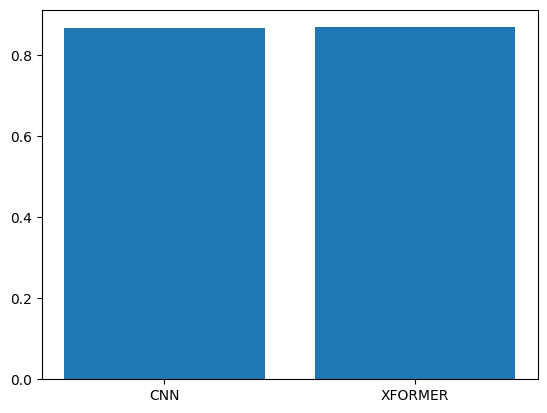

In [120]:
yhat_cnn = model.predict(X_test)
yhat_xformer = model_xformer.predict(X_test)

acc = [mt.accuracy_score(y_test.round(), yhat_cnn.round()),
       mt.accuracy_score(y_test.round(), yhat_xformer.round())]

plt.bar([1, 2], acc)
plt.xticks([1, 2], ['CNN', 'XFORMER'])
plt.show()
